# **CARGA Y PRE PROCESAMIENTO DE INFORMACION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Carncer DataSet - Hoja 1.csv")
a=dataset.columns
column_names = ['ID'] + ['Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
dataset.columns = column_names
dataset = dataset[0:]
dataset[568:]=a
dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          570 non-null    object
 1   Diagnosis   570 non-null    object
 2   Feature_1   570 non-null    object
 3   Feature_2   570 non-null    object
 4   Feature_3   570 non-null    object
 5   Feature_4   570 non-null    object
 6   Feature_5   570 non-null    object
 7   Feature_6   570 non-null    object
 8   Feature_7   570 non-null    object
 9   Feature_8   570 non-null    object
 10  Feature_9   570 non-null    object
 11  Feature_10  570 non-null    object
 12  Feature_11  570 non-null    object
 13  Feature_12  570 non-null    object
 14  Feature_13  570 non-null    object
 15  Feature_14  570 non-null    object
 16  Feature_15  570 non-null    object
 17  Feature_16  570 non-null    object
 18  Feature_17  570 non-null    object
 19  Feature_18  570 non-null    object
 20  Feature_19

Cambio de etiquetado por Benigni=0 y Maligno =1

In [ ]:
dataset = dataset.drop(['ID'], axis=1)
dataset['Diagnosis'] = dataset['Diagnosis'].map({'M': 1, 'B': 0})
dataset = dataset.drop(dataset.tail(1).index)
dataset

,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,1,20.57,17.77,132.9,1326.0,8.474,7.864,869.0,7.017,1.812,...,24.99,23.41,158.8,1956.0,1.238,1.866,2.416,186.0,275.0,8.902
1,1,19.69,21.25,130.0,1203.0,1.096,1.599,1.974,1.279,2.069,...,23.57,25.53,152.5,1709.0,1.444,4.245,4.504,243.0,3.613,8.758
2,1,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,...,14.91,26.5,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.0
3,1,20.29,14.34,135.1,1297.0,1.003,1.328,198.0,1.043,1.809,...,22.54,16.67,152.2,1575.0,1.374,205.0,0.4,1.625,2.364,7.678
4,1,12.45,15.7,82.57,477.1,1.278,0.17,1.578,8.089,2.087,...,15.47,23.75,103.4,741.6,1.791,5.249,5.355,1.741,3.985,1.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,20.13,28.25,131.2,1261.0,978.0,1.034,144.0,9.791,1.752,...,23.69,38.25,155.0,1731.0,1.166,1.922,3.215,1.628,2.572,6.637
565,1,16.6,28.08,108.3,858.1,8.455,1.023,9.251,5.302,159.0,...,18.98,34.12,126.7,1124.0,1.139,3.094,3.403,1.418,2.218,782.0
566,1,20.6,29.33,140.1,1265.0,1.178,277.0,3.514,152.0,2.397,...,25.74,39.42,184.6,1821.0,165.0,8.681,9.387,265.0,4.087,124.0
567,0,7.76,24.54,47.92,181.0,5.263,4.362,0.0,0.0,1.587,...,9.456,30.37,59.16,268.6,8.996,6.444,0.0,0.0,2.871,7.039


# **ANALISIS DE DATOS**

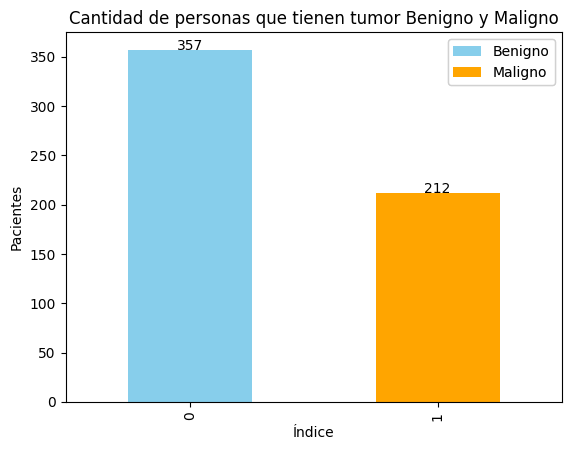

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
conteo_valores = dataset['Diagnosis'].value_counts()
ax=conteo_valores.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Índice')  # Puedes ajustar esto según tus necesidades
plt.ylabel('Pacientes')  # Puedes ajustar esto según tus necesidades
plt.title('Cantidad de personas que tienen tumor Benigno y Maligno')  # Puedes ajustar esto según tus necesidades
for i, v in enumerate(conteo_valores):
    ax.text(i, v + 0.1, str(v), color='black', ha='center')

# Agregar dos leyendas
legend1 = plt.legend([plt.Rectangle((0,0),1,1,fc='skyblue', edgecolor = 'none'), plt.Rectangle((0,0),1,1,fc='orange', edgecolor = 'none')], ['Benigno', 'Maligno'], loc='upper right')

# Añadir las leyendas al gráfico
plt.gca().add_artist(legend1)

plt.show()

# **IMPLEMENTACION DEL LA RED MLP**

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def dropout(x, keep_prob):
    mask = (np.random.rand(*x.shape) < keep_prob) / keep_prob
    return x * mask

def initialize_parameters(layer_sizes):
    np.random.seed(42)
    num_layers = len(layer_sizes)
    weights = [np.random.randn(layer_sizes[i-1], layer_sizes[i]) for i in range(1, num_layers)]
    biases = [np.zeros((1, layer_sizes[i])) for i in range(1, num_layers)]
    return weights, biases

def forward_propagation(X, weights, biases, activation_functions, dropout_prob=None):
    num_layers = len(weights) + 1
    layer_outputs = [X]
    for i in range(num_layers - 1):
        layer_inputs = np.dot(layer_outputs[-1], weights[i]) + biases[i]

        if dropout_prob is not None and i < num_layers - 2:
            layer_inputs = dropout(layer_inputs, dropout_prob)

        layer_outputs.append(activation_functions[i](layer_inputs))
    return layer_outputs

def backward_propagation(X, y_true, layer_outputs, weights, biases, learning_rate, activation_derivatives, dropout_prob=None):
    num_layers = len(weights) + 1
    output_error = layer_outputs[-1] - y_true
    deltas = [output_error * activation_derivatives[-1](layer_outputs[-1])]

    for i in range(num_layers - 2, 0, -1):
        hidden_error = np.dot(deltas[0], weights[i].T)
        deltas.insert(0, hidden_error * activation_derivatives[i](layer_outputs[i]))

        if dropout_prob is not None:
            deltas[0] *= dropout(layer_outputs[i], dropout_prob)

    for i in range(num_layers - 1):
        weights[i] -= learning_rate * np.dot(layer_outputs[i].T, deltas[i])
        biases[i] -= learning_rate * np.sum(deltas[i], axis=0, keepdims=True)

def calculate_loss(y_true, predicted_output):
    return -np.mean(y_true * np.log(predicted_output) + (1 - y_true) * np.log(1 - predicted_output))


def train(X, y, layer_sizes, learning_rate, epochs, activation_functions, activation_derivatives, dropout_prob=None):
    num_layers = len(layer_sizes)
    weights, biases = initialize_parameters(layer_sizes)
    loss_=[]
    accuracy_ = []
    for epoch in range(epochs):
        layer_outputs = forward_propagation(X, weights, biases, activation_functions, dropout_prob)
        backward_propagation(X, y, layer_outputs, weights, biases, learning_rate, activation_derivatives, dropout_prob)

        if epoch % 1 == 0:
            loss = calculate_loss(y, layer_outputs[-1])
            loss_.append(loss)

            # Calcular la precisión en cada iteración
            predictions = predict(X, weights, biases, activation_functions)
            predictions_binary = (predictions > 0.5).astype(int)
            accuracy = np.mean(predictions_binary == y.reshape(-1, 1))
            accuracy_.append(accuracy)



    return loss_, accuracy_, weights, biases

def predict(X, weights, biases, activation_functions):
    layer_outputs = forward_propagation(X, weights, biases, activation_functions)
    return layer_outputs[-1]


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop(['Diagnosis'], axis=1).values
y = dataset['Diagnosis'].values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=40)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=40)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



# **MODELO 1: COMPLEJIDAD 6 CAPAS: 1 ENTRADA (30 NEURONAS), 4 CAPAS OCULTAS (10 NEURONAS c.u) y 1 SALIDA (1 NEURONA)**

<ipython-input-6-2348b042ca96>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Precisión del modelo: 92.40%


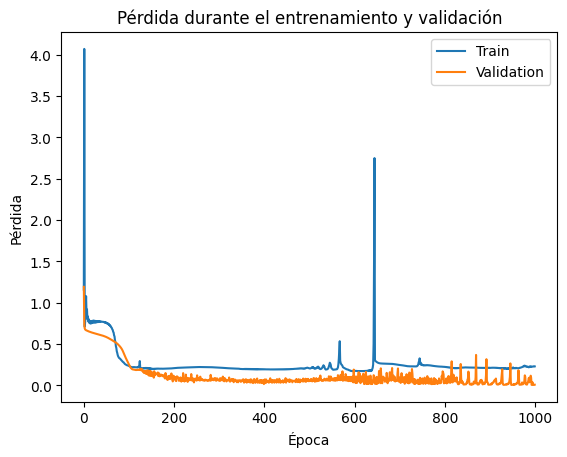

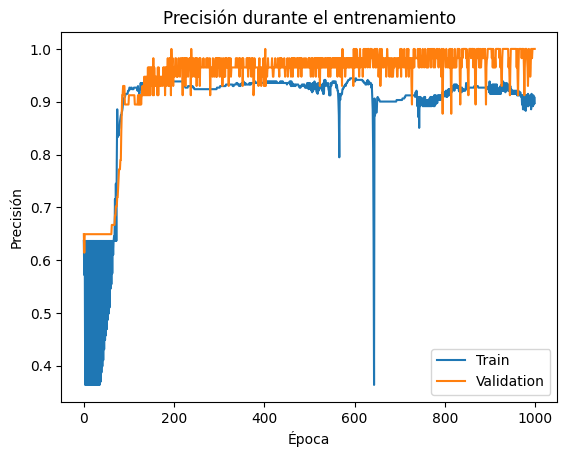

In [ ]:
# Definir hiperparámetros
input_size = X_train.shape[1]
layer_sizes = [input_size, 10,10,10,10, 1]  # Número de neuronas en cada capa
learning_rate = 0.1
epochs = 1000

# Entrenar el modelo
loss_train, accuracy_train, weights, biases = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid,sigmoid,sigmoid], [sigmoid_derivative, sigmoid_derivative,sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)
loss_val, accuracy_val, weightsv, biasesv = train(X_val_scaled, y_val.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid,sigmoid,sigmoid], [sigmoid_derivative, sigmoid_derivative,sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)

# Hacer predicciones en el conjunto de prueba

predictions = predict(X_test_scaled, weights, biases, [sigmoid,sigmoid,sigmoid,sigmoid,sigmoid])

# Convertir las predicciones
predictions_binary = (predictions > 0.5).astype(int)

# Calcular la precisión del modelo
accuracy = np.mean(predictions_binary == y_test.reshape(-1, 1))
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento y validación
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.title('Pérdida durante el entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión durante el entrenamiento
plt.plot(accuracy_train, label='Train')
plt.plot(accuracy_val, label='Validation')

plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

Precisión del modelo: 92.40%


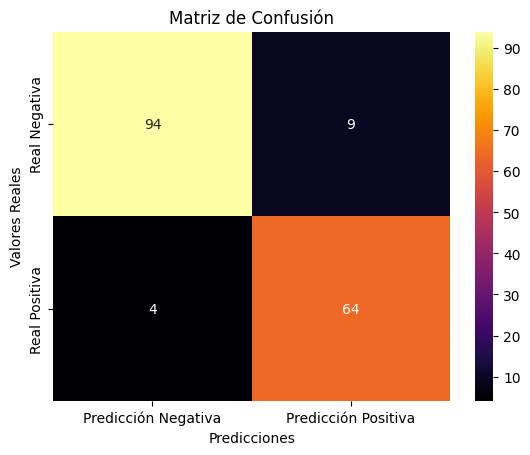

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
accuracy = np.mean(predictions_binary == y_test.reshape(-1, 1))
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno", xticklabels=["Predicción Negativa", "Predicción Positiva"], yticklabels=["Real Negativa", "Real Positiva"])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# **MODELO 2: COMPLEJIDAD 4 CAPAS: 1 ENTRADA (30 NEURONAS), 2 CAPAS OCULTAS (10 NEURONAS c.u) y 1 SALIDA (1 NEURONA)**

**Learning rete= 0.001**

Precisión del modelo: 91.23%


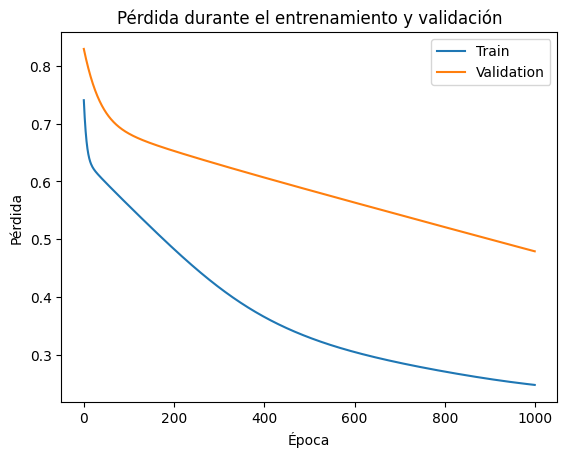

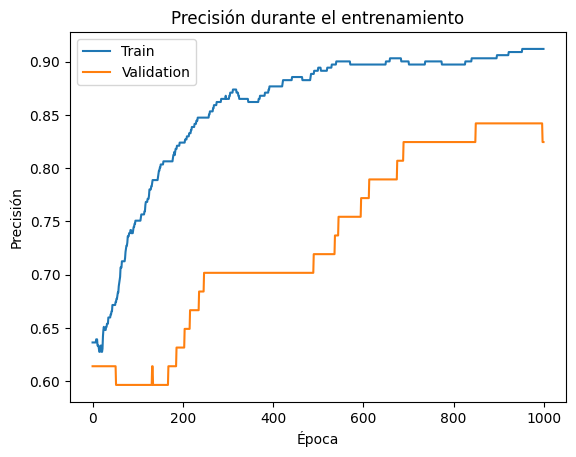

In [ ]:
X = dataset.drop(['Diagnosis'], axis=1).values
y = dataset['Diagnosis'].values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=40)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=100)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
# Definir hiperparámetros
input_size = X_train.shape[1]
layer_sizes = [input_size, 10,10, 1]  # Número de neuronas en cada capa (ajusta según tu problema)
learning_rate = 0.001
epochs = 1000

# Entrenar el modelo
loss_train, accuracy_train, weights, biases = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid], [sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)
loss_val, accuracy_val, weightsv, biasesv = train(X_val_scaled, y_val.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid], [sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)

# Hacer predicciones en el conjunto de prueba


predictions = predict(X_test_scaled, weights, biases, [sigmoid,sigmoid,sigmoid])

# Convertir las predicciones a etiquetas binarias (0 o 1)
predictions_binary = (predictions > 0.5).astype(int)

# Calcular la precisión del modelo
accuracy = np.mean(predictions_binary == y_test.reshape(-1, 1))
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento y validación
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.title('Pérdida durante el entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión durante el entrenamiento
plt.plot(accuracy_train, label='Train')
plt.plot(accuracy_val, label='Validation')

plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

**Learning rete= 0.01**

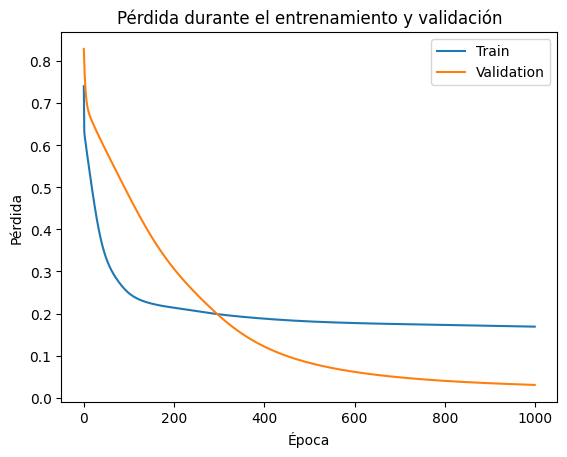

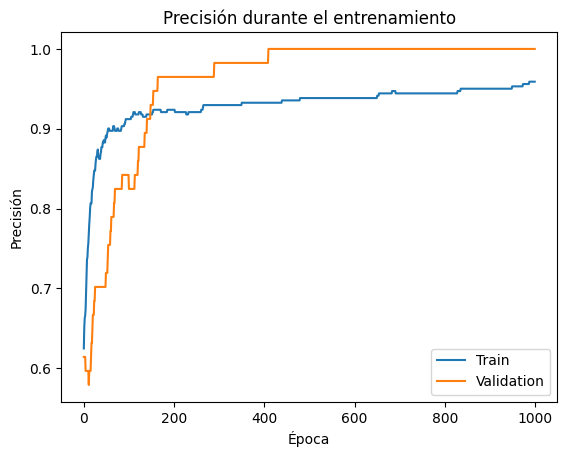

In [ ]:
learning_rate = 0.01
epochs = 1000

# Entrenar el modelo
loss_train, accuracy_train, weights, biases = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid], [sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)
loss_val, accuracy_val, weightsv, biasesv = train(X_val_scaled, y_val.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid], [sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)

# Hacer predicciones en el conjunto de prueba

import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento y validación
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.title('Pérdida durante el entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión durante el entrenamiento
plt.plot(accuracy_train, label='Train')
plt.plot(accuracy_val, label='Validation')

plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

**Learning rete= 0.1**

<ipython-input-6-2348b042ca96>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


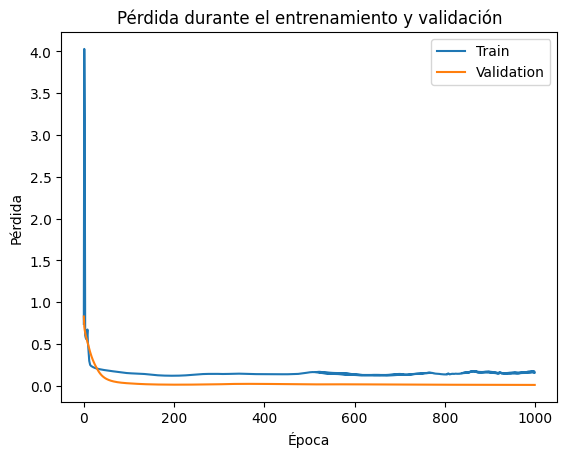

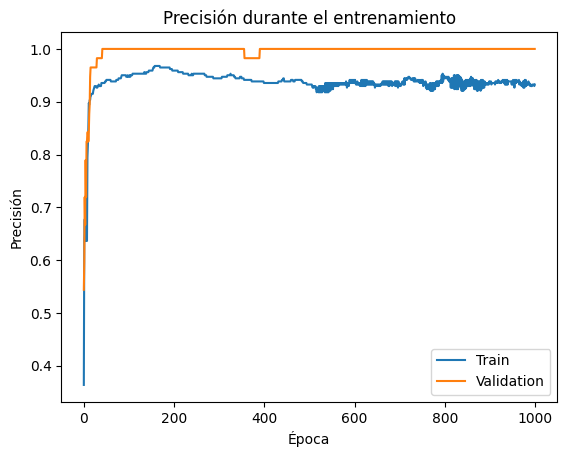

In [ ]:
learning_rate = 0.1
epochs = 1000

# Entrenar el modelo
loss_train, accuracy_train, weights, biases = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid], [sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)
loss_val, accuracy_val, weightsv, biasesv = train(X_val_scaled, y_val.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid], [sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)

# Hacer predicciones en el conjunto de prueba

import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento y validación
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.title('Pérdida durante el entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión durante el entrenamiento
plt.plot(accuracy_train, label='Train')
plt.plot(accuracy_val, label='Validation')

plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

**Learning rete= 0.64**

<ipython-input-6-2348b042ca96>:61: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(predicted_output) + (1 - y_true) * np.log(1 - predicted_output))
<ipython-input-6-2348b042ca96>:61: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(predicted_output) + (1 - y_true) * np.log(1 - predicted_output))
<ipython-input-6-2348b042ca96>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


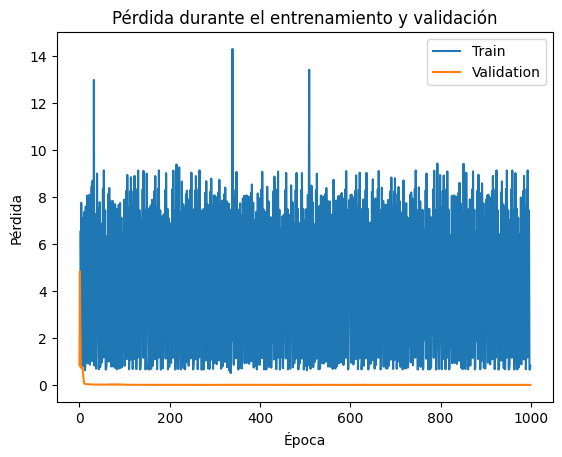

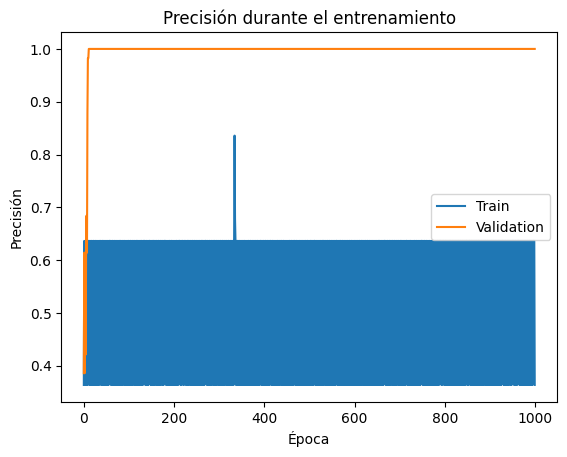

In [ ]:
learning_rate = 0.64
epochs = 1000

# Entrenar el modelo
loss_train, accuracy_train, weights, biases = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid], [sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)
loss_val, accuracy_val, weightsv, biasesv = train(X_val_scaled, y_val.reshape(-1, 1), layer_sizes, learning_rate, epochs, [sigmoid,sigmoid,sigmoid], [sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)

# Hacer predicciones en el conjunto de prueba

import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento y validación
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.title('Pérdida durante el entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión durante el entrenamiento
plt.plot(accuracy_train, label='Train')
plt.plot(accuracy_val, label='Validation')

plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# **MODELO 3: COMPLEJIDAD 4 CAPAS: 1 ENTRADA (30 NEURONAS), 2 CAPAS OCULTAS (10 NEURONAS c.u) y 1 SALIDA (1 NEURONA)**

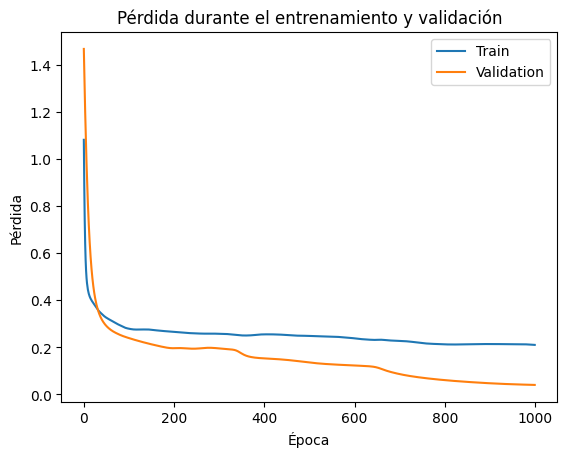

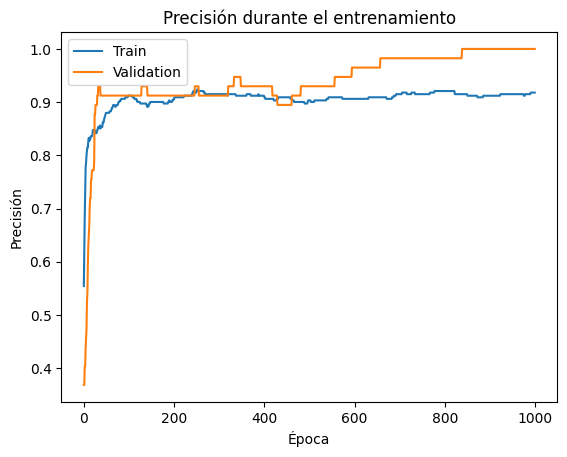

In [ ]:
learning_rate = 0.01
epochs = 1000

# Entrenar el modelo
loss_train, accuracy_train, weights, biases = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate, epochs, [tanh,tanh,sigmoid], [tanh_derivative,tanh_derivative,sigmoid_derivative],dropout_prob=1)
loss_val, accuracy_val, weightsv, biasesv = train(X_val_scaled, y_val.reshape(-1, 1), layer_sizes, learning_rate, epochs, [tanh,tanh,sigmoid], [tanh_derivative,tanh_derivative,sigmoid_derivative],dropout_prob=1)

# Hacer predicciones en el conjunto de prueba

import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento y validación
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.title('Pérdida durante el entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión durante el entrenamiento
plt.plot(accuracy_train, label='Train')
plt.plot(accuracy_val, label='Validation')

plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# **MODELO 4: COMPLEJIDAD 4 CAPAS: 1 ENTRADA (30 NEURONAS), 2 CAPAS OCULTAS (10 NEURONAS c.u) y 1 SALIDA (1 NEURONA)**

<ipython-input-6-2348b042ca96>:61: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(predicted_output) + (1 - y_true) * np.log(1 - predicted_output))
<ipython-input-6-2348b042ca96>:61: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(predicted_output) + (1 - y_true) * np.log(1 - predicted_output))


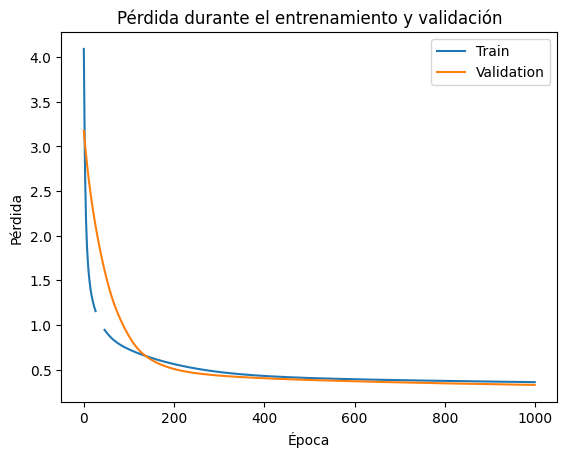

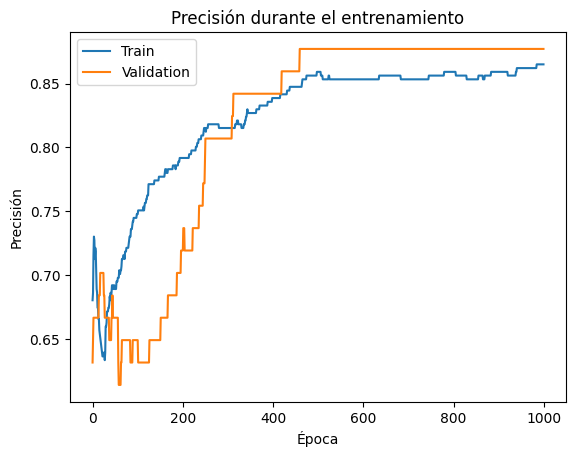

In [ ]:
learning_rate = 0.0001
epochs = 1000

# Entrenar el modelo
loss_train, accuracy_train, weights, biases = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate, epochs, [relu,relu,sigmoid], [relu_derivative,relu_derivative,sigmoid_derivative],dropout_prob=1)
loss_val, accuracy_val, weightsv, biasesv = train(X_val_scaled, y_val.reshape(-1, 1), layer_sizes, learning_rate, epochs, [relu,relu,sigmoid], [relu_derivative,relu_derivative,sigmoid_derivative],dropout_prob=1)

# Hacer predicciones en el conjunto de prueba

import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento y validación
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.title('Pérdida durante el entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión durante el entrenamiento
plt.plot(accuracy_train, label='Train')
plt.plot(accuracy_val, label='Validation')

plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# **EFICIENCIA DE TESTING ENTRE LOS 3 MODELOS CON FUNCION DE ACTIVACION SIGMOID, TANH, RELU**

In [ ]:
learning_rate_s = 0.1
learning_rate_t = 0.03
learning_rate_r = 0.0001
epochs = 1000

# Entrenar el modelo
loss_train, accuracy_train, weights_sigmoid, biases = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate_s, epochs, [sigmoid,sigmoid,sigmoid], [sigmoid_derivative,sigmoid_derivative,sigmoid_derivative],dropout_prob=1)
predictions_sigmoid = predict(X_test_scaled, weights_sigmoid, biases, [sigmoid,sigmoid,sigmoid])
loss_train, accuracy_train, weights_tanh, biases_tanh = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate_t, epochs, [tanh,tanh,sigmoid], [tanh_derivative,tanh_derivative,sigmoid_derivative],dropout_prob=1)
predictions_tanh = predict(X_test_scaled, weights_tanh, biases_tanh, [tanh,tanh,sigmoid])
loss_train, accuracy_train, weights_relu, biases_relu = train(X_train_scaled, y_train.reshape(-1, 1), layer_sizes, learning_rate_r, epochs, [relu,relu,sigmoid], [relu_derivative,relu_derivative,sigmoid_derivative],dropout_prob=1)
predictions_relu = predict(X_test_scaled, weights_relu, biases_relu, [relu,relu,sigmoid])
# Convertir las predicciones a etiquetas binarias (0 o 1)
predictions_binary = (predictions_sigmoid > 0.5).astype(int)
predictions_binary_tanh = (predictions_tanh > 0.5).astype(int)
predictions_binary_relu = (predictions_relu > 0.5).astype(int)
# Calcular la precisión del modelo

accuracy_binary = np.mean(predictions_binary == y_test.reshape(-1, 1))
accuracy_tanh = np.mean(predictions_binary_tanh == y_test.reshape(-1, 1))
accuracy_relu = np.mean(predictions_binary_relu == y_test.reshape(-1, 1))
data = {
    'Modelo': ['Sigmoid', 'Tanh', 'ReLU'],
    'Accuracy': [accuracy_binary, accuracy_tanh, accuracy_relu]
}

df = pd.DataFrame(data)
df

<ipython-input-6-2348b042ca96>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-6-2348b042ca96>:61: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(predicted_output) + (1 - y_true) * np.log(1 - predicted_output))
<ipython-input-6-2348b042ca96>:61: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(predicted_output) + (1 - y_true) * np.log(1 - predicted_output))


,Modelo,Accuracy
0,Sigmoid,0.918129
1,Tanh,0.929825
2,ReLU,0.847953


# **MATRIZ DE CONFUSION ENTRE LOS 3 MODELOS CON FUNCION DE ACTIVACION SIGMOID, TANH, RELU**

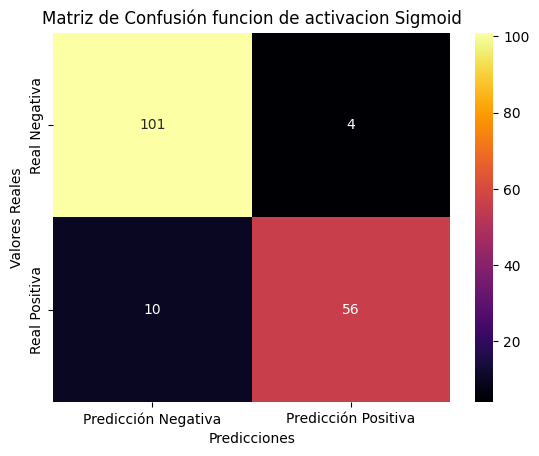

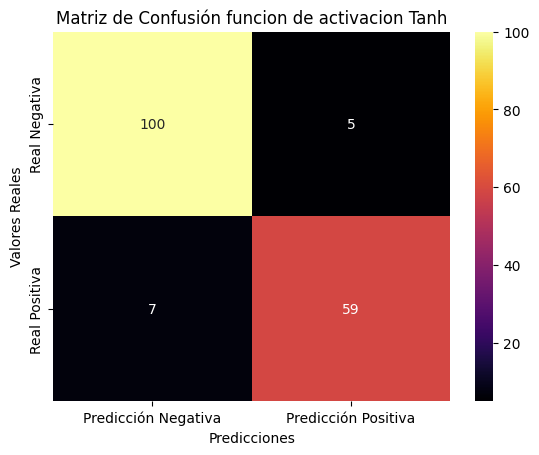

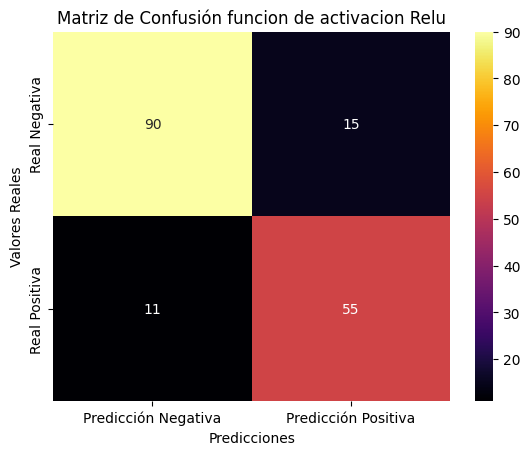

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno", xticklabels=["Predicción Negativa", "Predicción Positiva"], yticklabels=["Real Negativa", "Real Positiva"])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión funcion de activacion Sigmoid')
plt.show()

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions_binary_tanh)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno", xticklabels=["Predicción Negativa", "Predicción Positiva"], yticklabels=["Real Negativa", "Real Positiva"])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión funcion de activacion Tanh')
plt.show()

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions_binary_relu)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno", xticklabels=["Predicción Negativa", "Predicción Positiva"], yticklabels=["Real Negativa", "Real Positiva"])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión funcion de activacion Relu')
plt.show()